In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
# df = pd.read_csv('~/Documents/DATAScience/Github/AdvancedAnalytics-MADT8101/Week02_CustomerSingleView/supermarket.csv') ## for MacOS
df = pd.read_csv('D:\DATA_Science\GitHub\AdvancedAnalytics-MADT8101\Week02_CustomerSingleView\supermarket.csv') ## for Windows

df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

# STEP 1
- CLEAN DATA

In [4]:
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')

# drop NaN (for non-member only)

filnanfordf = ['CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE']

for x in filnanfordf :
    df[x] = df[x].fillna('XX')

df.dropna(inplace=True)

df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,2007-10-19,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,2008-03-28,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,XX,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
1115,200815,2008-06-05,5,15,1,0.70,PRD0904509,CL00093,DEP00028,G00008,...,LA,OF,994111300258138,L,LA,Top Up,Grocery,STORE00001,LS,E02
1116,200642,2006-12-13,4,15,1,2.04,PRD0904730,CL00214,DEP00071,G00022,...,LA,OF,994103600221562,L,LA,Full Shop,Fresh,STORE00001,LS,E02
1117,200720,2007-07-13,6,17,1,2.19,PRD0900777,CL00098,DEP00031,G00008,...,LA,OA,994106600615672,L,MM,Full Shop,Mixed,STORE00001,LS,E02


- Prepare DATA (Transform)

In [5]:
df['order_month'] = df['SHOP_DATE'].dt.to_period('M')

df.loc[:,['SHOP_DATE','order_month']].head()

,SHOP_DATE,order_month
0,2007-10-19,2007-10
1,2008-03-28,2008-03
1115,2008-06-05,2008-06
1116,2006-12-13,2006-12
1117,2007-07-13,2007-07


In [6]:
from operator import attrgetter

df['start_month'] = df.groupby('CUST_CODE')['SHOP_DATE'].transform('min').dt.to_period('M')
df['period_number'] = (df['order_month'] - df['start_month']).apply(attrgetter('n')).astype(int)

print(f'#### BEFORE ####\n')
display(df.loc[:,['CUST_CODE','SHOP_DATE','order_month','start_month','period_number']])

# Preparing for a PLOT

print(f'#### AFTER ####\n')
df_cohort = df.groupby(['start_month', 'order_month']).agg(n_customers=('CUST_CODE', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort['order_month'] - df_cohort['start_month']).apply(attrgetter('n'))

cohort_pivot = df_cohort.pivot_table(index='start_month', columns='period_number', values='n_customers')

display(cohort_pivot)

#### BEFORE ####



,CUST_CODE,SHOP_DATE,order_month,start_month,period_number
0,CUST0000804514,2007-10-19,2007-10,2007-10,0
1,CUST0000735558,2008-03-28,2008-03,2008-03,0
1115,CUST0000138092,2008-06-05,2008-06,2006-04,26
1116,CUST0000099658,2006-12-13,2006-12,2006-04,8
1117,CUST0000673735,2007-07-13,2007-07,2006-04,15
...,...,...,...,...,...
578077,CUST0000451458,2007-11-16,2007-11,2006-04,19
578078,CUST0000957158,2007-06-12,2007-06,2006-04,14
578079,CUST0000111024,2006-11-09,2006-11,2006-08,3
578080,CUST0000412413,2007-06-24,2007-06,2006-05,13


#### AFTER ####



period_number,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
start_month,,,,,,,,,,,,,,,,,,,,,
2006-04,530.0,346.0,355.0,370.0,358.0,363.0,354.0,338.0,354.0,337.0,...,301.0,296.0,301.0,291.0,288.0,292.0,343.0,367.0,358.0,182.0
2006-05,304.0,98.0,116.0,113.0,125.0,117.0,111.0,113.0,116.0,101.0,...,95.0,97.0,92.0,85.0,93.0,104.0,123.0,117.0,46.0,NaN
2006-06,196.0,64.0,72.0,71.0,52.0,61.0,72.0,53.0,46.0,59.0,...,61.0,41.0,46.0,44.0,58.0,63.0,64.0,22.0,NaN,NaN
2006-07,226.0,70.0,69.0,69.0,61.0,52.0,56.0,53.0,48.0,55.0,...,46.0,44.0,54.0,59.0,57.0,64.0,23.0,NaN,NaN,NaN
2006-08,221.0,51.0,50.0,41.0,55.0,40.0,45.0,51.0,45.0,36.0,...,27.0,27.0,47.0,43.0,53.0,13.0,NaN,NaN,NaN,NaN
2006-09,214.0,56.0,50.0,52.0,42.0,34.0,44.0,33.0,37.0,39.0,...,32.0,49.0,51.0,49.0,10.0,NaN,NaN,NaN,NaN,NaN
2006-10,149.0,35.0,42.0,39.0,25.0,31.0,23.0,26.0,22.0,22.0,...,32.0,36.0,37.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2006-11,130.0,27.0,28.0,26.0,31.0,23.0,24.0,25.0,24.0,29.0,...,23.0,35.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12,142.0,27.0,15.0,25.0,21.0,23.0,20.0,23.0,17.0,13.0,...,32.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- PLOT : Cohort Analysis

In [7]:
# Separate column 0 (number of new customer in each months)
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size = pd.DataFrame(cohort_size).rename(columns={0: 'new_member_size'})

# Divided by number of start months
cohort_pivot = cohort_pivot.divide(cohort_size['new_member_size'], axis=0)

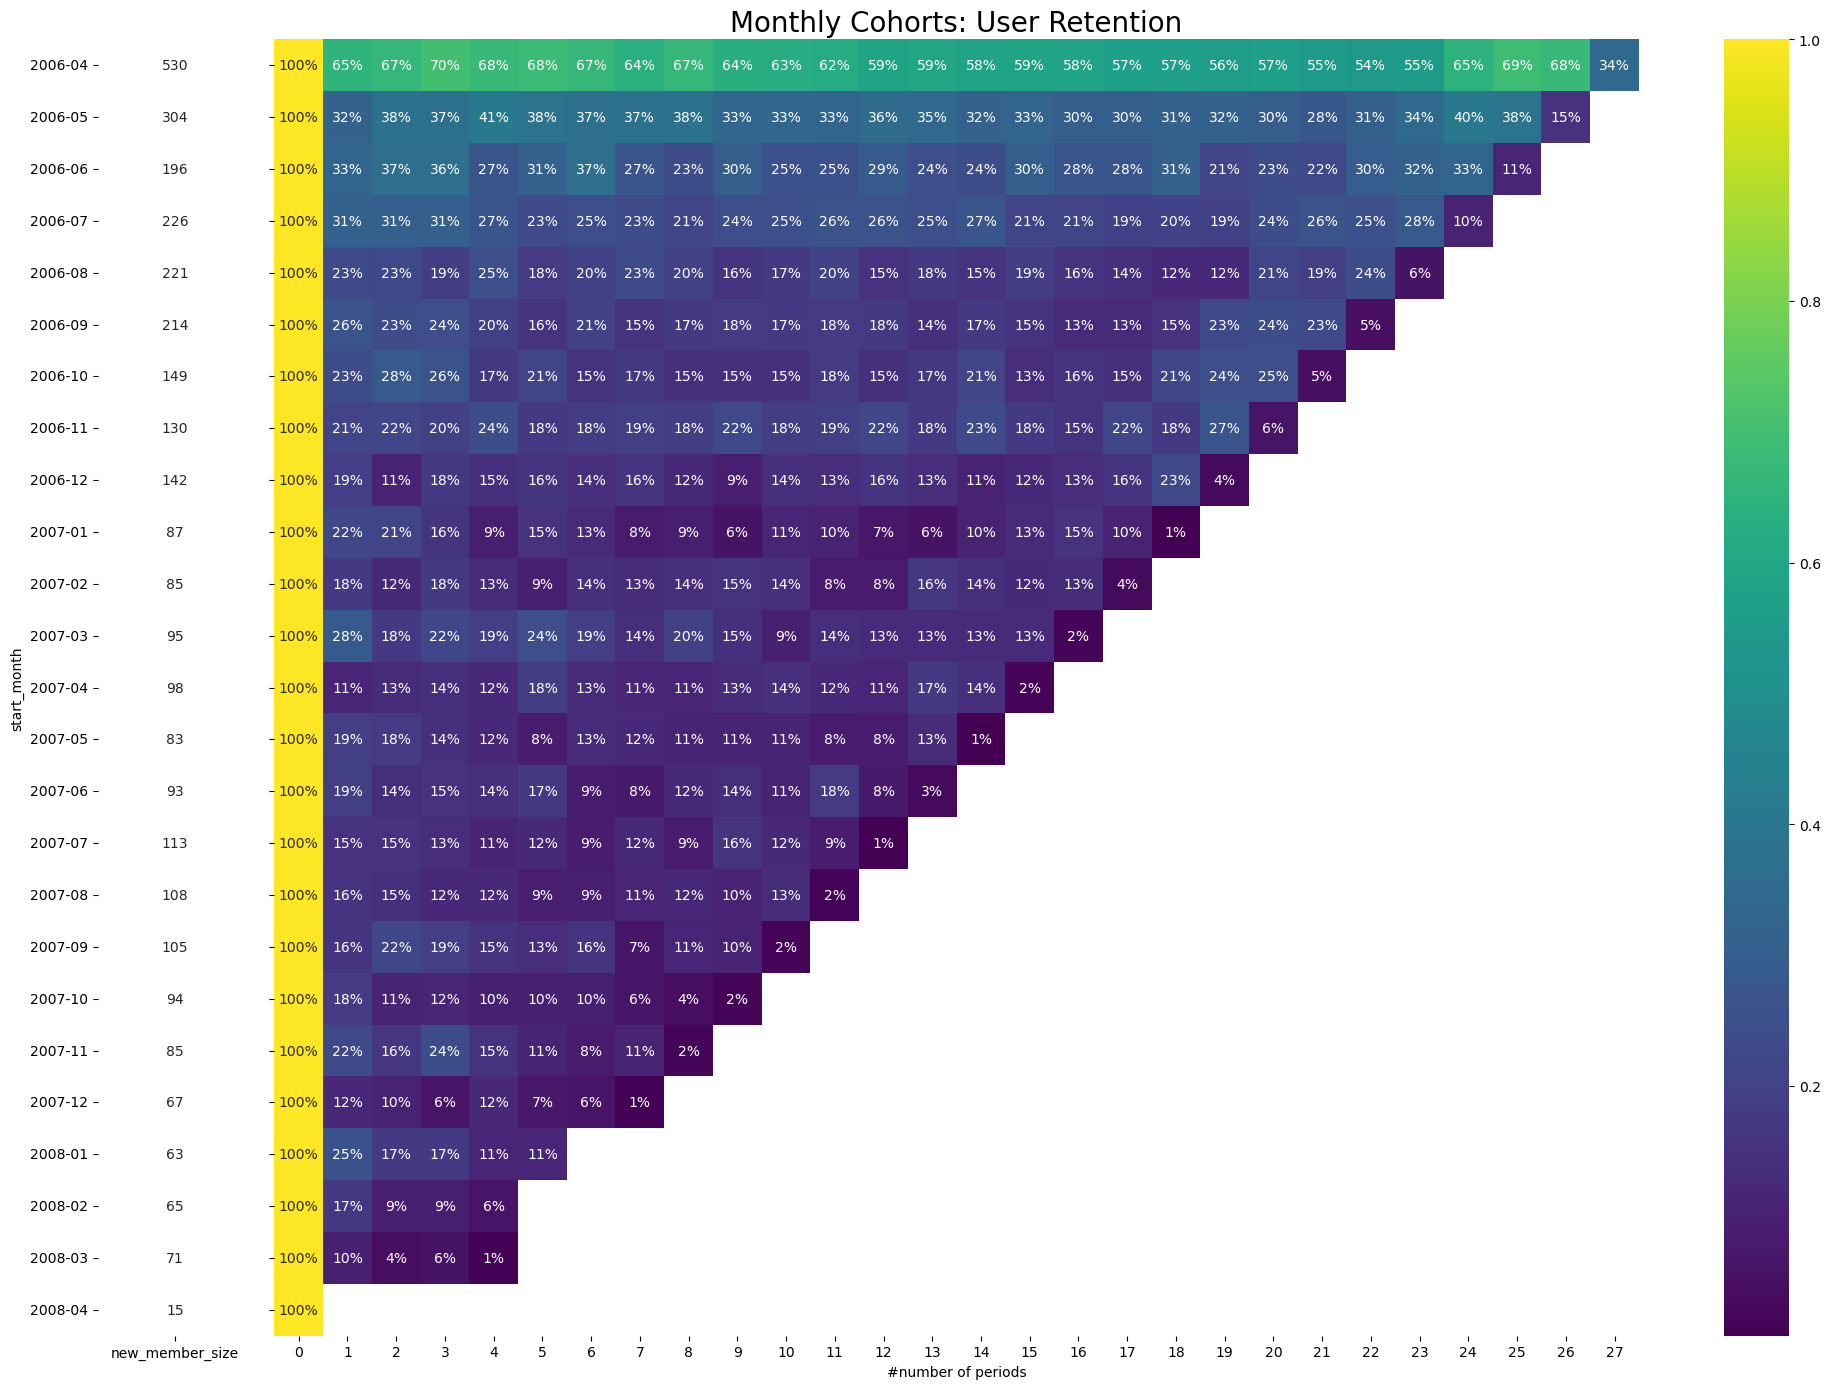

In [8]:
# PLOT

import matplotlib.colors as mcolors

sns.axes_style("white")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 14), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

# retention matrix
sns.heatmap(cohort_pivot, 
            mask=cohort_pivot.isnull(), 
            annot=True, 
            fmt='.0%', 
            cmap='viridis', 
            ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention', fontsize=20)
ax[1].set(xlabel='#number of periods',
            ylabel='')

# cohort size
white_cmap = mcolors.ListedColormap(['white'])
sns.heatmap(cohort_size, 
            annot=True, 
            cbar=False, 
            fmt='g', 
            cmap=white_cmap, 
            ax=ax[0])

fig.tight_layout()

# STEP 2
- Define Customer

In [9]:
selectcol = ['CUST_CODE','order_month','period_number']

newdf = df.loc[:,selectcol].sort_values(by=['order_month','CUST_CODE']).drop_duplicates().reset_index(drop=True)
newdf['order_month'] = pd.to_datetime( newdf['order_month'].astype(str) )

newdf

,CUST_CODE,order_month,period_number
0,CUST0000001194,2006-04-01,0
1,CUST0000004088,2006-04-01,0
2,CUST0000008415,2006-04-01,0
3,CUST0000013258,2006-04-01,0
4,CUST0000015935,2006-04-01,0
...,...,...,...
22486,CUST0000995115,2008-07-01,27
22487,CUST0000996753,2008-07-01,27
22488,CUST0000996878,2008-07-01,27
22489,CUST0000997122,2008-07-01,27


In [10]:
newdf.pivot_table(columns='order_month', index='CUST_CODE',values='period_number')

order_month,2006-04-01,2006-05-01,2006-06-01,2006-07-01,2006-08-01,2006-09-01,2006-10-01,2006-11-01,2006-12-01,2007-01-01,...,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01
CUST_CODE,,,,,,,,,,,,,,,,,,,,,
CUST0000000181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000000689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,5.0,6.0,NaN,NaN,9.0,10.0,11.0,NaN
CUST0000000998,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000001163,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN
CUST0000001194,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST0000999439,NaN,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,25.0,26.0
CUST0000999544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000999593,NaN,0.0,NaN,NaN,3.0,4.0,5.0,6.0,7.0,8.0,...,17.0,NaN,NaN,20.0,21.0,22.0,23.0,NaN,NaN,NaN


In [35]:
# for i in newdf['CUST_CODE'].unique() :
#     x=newdf.loc[ (newdf['CUST_CODE'] == i) , ]['period_number']
#     for i0,j in enumerate(x):
#         if i0==0 and i0==j : 
#             x=x.replace(j,'NEW')
#             n=j
#         elif n+1==j : 
#             x=x.replace(j,'REPEAT')
#             n+=1
#         elif n+1 < j :
#             x = x.replace(j,'REACTIVATE')
#             n=j


In [51]:
x=newdf.loc[ (newdf['CUST_CODE'] == 'CUST0000999439') , ]['period_number']
display(x)

for i0,j in enumerate(x):
    if i0==0 and i0==j : 
        x=x.replace(j,'NEW')
        n=j
    elif n+1==j : 
        x=x.replace(j,'REPEAT')
        n+=1
    elif n+1 < j :
        x = x.replace(j,'REACTIVATE')
        n=j
x

1178      0
1828      1
2604      2
3436      3
13541    15
14411    16
19372    22
22150    25
22490    26
Name: period_number, dtype: int32

1178            NEW
1828         REPEAT
2604         REPEAT
3436         REPEAT
13541    REACTIVATE
14411        REPEAT
19372    REACTIVATE
22150    REACTIVATE
22490        REPEAT
Name: period_number, dtype: object